In [44]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
from scipy.special import jn_zeros
from scipy.optimize import fsolve
plt.style.use("science")
cm = 1/2.54

estilo_graficos = ["science", "nature"] #@param
plt.style.use(estilo_graficos)
texto_pt = 10 #@param
plt.rcParams['font.size'] = texto_pt
proporciones = (3, 2)
plt.rcParams['figure.figsize'] = proporciones
dpi = 100 #@param
plt.rcParams['figure.dpi'] = dpi

In [81]:
# Parámetros

sigma = 0.07275  # N/m
h     = 5e-2     # m
rho   = 1000     # Kg / m^3
g     = 9.8      # m/s^2
nu    = 1e-6     # m^2 s

In [82]:
# Relaciones de dispersión

def w_gravito_capilares(k):
    return np.sqrt(k*(g + sigma*k**2/rho)*np.tanh(k*h))

def w_gravedad(k):
    return np.sqrt(k*g*np.tanh(k*h))

def w_capilares(k):
    return np.sqrt(k*(sigma*k**2/rho)*np.tanh(k*h))

def k_gravito_capilares(ws):
    return np.array([*map(lambda w_: fsolve(lambda k_: w_gravito_capilares(k_)-w_, 0)[0], ws)])

def k_gravedad(ws):
    return np.array([*map(lambda w_: fsolve(lambda k_: w_gravedad(k_)-w_, 0)[0], ws)])

def k_capilares(ws):
    return np.array([*map(lambda w_: fsolve(lambda k_: w_capilares(k_)-w_, 0)[0], ws)])

k_rel_disp_dict = {
    "Gravito-Capilares": k_gravito_capilares,
    "Gravedad": k_gravedad,
    "Capilares": k_capilares,
}

w_rel_disp_dict = {
    "Gravito-Capilares": w_gravito_capilares,
    "Gravedad": w_gravedad,
    "Capilares": w_capilares,
}

# Definición del factor de adimensionalización
def K(w): 
    return w**2/g

def w(K):
    return np.sqrt(K*g)


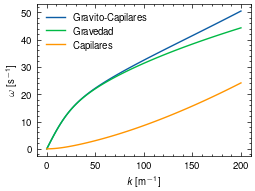

/tmp/ipykernel_65308/23251331.py:17: RuntimeWarning: invalid value encountered in divide
  plt.plot(ks, rel_disp(ks) / ks, label = label)


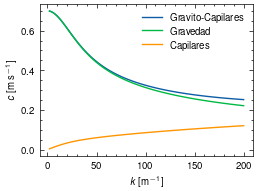

In [83]:
# Gráficos de $\omega$ y $c$ en función de $k$

ks = np.linspace(0, 200, 100)

plt.figure(figsize = (7*cm, 5*cm))
for label, rel_disp in w_rel_disp_dict.items():
    plt.plot(ks, rel_disp(ks), label = label)

plt.xlabel("$k$ [m$^{-1}$]")
plt.ylabel("$\omega$ [s$^{-1}$]")
plt.legend(loc = "upper left")
plt.savefig("k-vs-w.pdf", dpi = 200)
plt.show()

plt.figure(figsize = (7*cm, 5*cm))
for label, rel_disp in w_rel_disp_dict.items():
    plt.plot(ks, rel_disp(ks) / ks, label = label)

plt.xlabel("$k$ [m$^{-1}$]")
plt.ylabel("$c$ [m s$^{-1}$]")
plt.legend(loc = "upper right")
plt.savefig("k-vs-c.pdf", dpi = 200)
plt.show()

/tmp/ipykernel_65308/2366586146.py:7: RuntimeWarning: invalid value encountered in divide
  plt.plot(ks, (w_gravito_capilares(ks)-w_gravedad(ks))/w_gravito_capilares(ks))
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


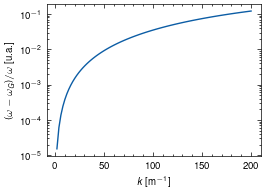

In [100]:
# Gráfico de $\omega-\omega_g$ en función de $k$

ks = np.linspace(0, 200, 100)

plt.figure(figsize = (7*cm, 5*cm))
# for label, rel_disp in w_rel_disp_dict.items():
plt.plot(ks, (w_gravito_capilares(ks)-w_gravedad(ks))/w_gravito_capilares(ks))
plt.semilogy()
plt.xlabel("$k$ [m$^{-1}$]")
plt.ylabel("$(\omega - \omega_{G}) / \omega$ [u.a.]")
plt.legend(loc = "upper left")
plt.savefig("(w-wg)vsk.pdf", dpi = 200)
plt.show()

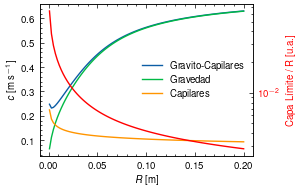

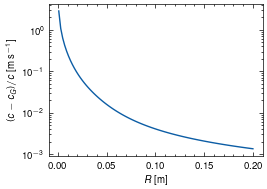

In [102]:
# Gráficos de $k$ y $c$ en función de R

Rs = np.linspace(0.1, 20, 100)*1e-2
R_adim = jn_zeros(0,1)[0]
Ks = R_adim/Rs
ws = w(Ks)

plt.figure(figsize = (7*cm, 5*cm))
ax = plt.axes()
for label, rel_disp in k_rel_disp_dict.items():
    ax.plot(Rs, ws/rel_disp(ws), label = label)

# Prandtl
cs = ws/k_gravito_capilares(ws)
delta = np.sqrt(nu*Rs/cs)

axtwin = ax.twinx()
axtwin.plot(Rs, delta/Rs, color = "red")
axtwin.set_ylabel("Capa Límite / R [u.a.]", color = "red")
axtwin.tick_params(axis='y', labelcolor="red")
axtwin.semilogy()

ax.set_xlabel("$R$ [m]")
ax.set_ylabel("$c$ [m s$^{-1}$]")
ax.legend(loc = "right")
plt.savefig("R-vs-c.pdf", dpi = 200)
plt.show()

plt.figure(figsize = (7*cm, 5*cm))
plt.plot(Rs, (ws/k_gravito_capilares(ws) - ws/k_gravedad(ws)) / (ws/k_gravedad(ws)), label = label)

plt.xlabel("$R$ [m]")
plt.ylabel("$(c - c_{G}) / c$ [m s$^{-1}$]")
plt.semilogy()
plt.savefig("R-vs-cdiff.pdf", dpi = 200)
plt.show()